<a href="https://colab.research.google.com/github/ikrarmuhamad/nlp-classification-product-category/blob/main/e_commerce_product_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk

In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/drive/MyDrive/Data/Dataset Project/ecommerceDataset.zip', 'r')
zip.extractall()
zip.close()

In [ ]:
df = pd.read_csv('ecommerceDataset.csv', header=None)

In [ ]:
df.rename(columns = {0 : 'label',
                     1 : 'text'},
          inplace = True)

#Data Overview

In [ ]:
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


<Axes: ylabel='label'>

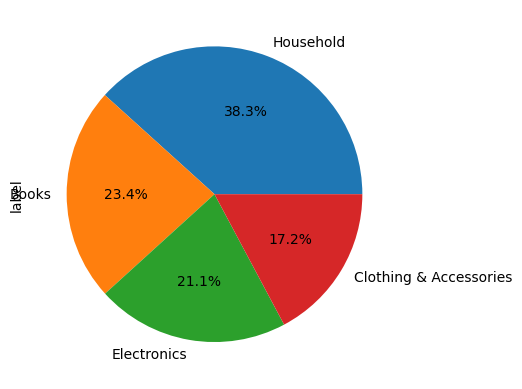

In [ ]:
df['label'].value_counts(True).plot(kind = 'pie', autopct = '%1.1f%%')

In [ ]:
df.text[0], df.label[0]

('Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bli

In [ ]:
import random
for i in range(5):
  rand = random.choice(range(len(df)))
  print(f"Label : \n{df.label[rand]}")
  print(f"Text :\n{df.text[rand]}\n")
  print("---")

Label : 
Electronics
Text :
Zeffcon QXN PRO Remote Shutter Release Bluetooth Camera Control for iOS and Android Smartphone Tablet (Black) Wireless Bluetooth Remote for Mobile Photography The Bluetooth remote allows mobile photographers to capture shots while up to 30 feet from their device. Compatible with IOS and Android (Not compatible with Windows

---
Label : 
Household
Text :
Crompton ACGIH-IHL102 1000-Watt Immersion Water Heater (Black) Style:1000 watts   Crompton greaves immersion water heater 1000watts indicator lamp water level indicator isi cg-ihl 102

---
Label : 
Books
Text :
Bankers' Handbook on Credit Management (IIBF) Bankers’ Handbook on Credit Management is designed keeping in view the specific skill needs of banking professionals in handling the credit portfolio in a bank. Credit is an important business function and credit management is a dynamic subject. The book deals with the credit function of commercial banks covering various aspects such as credit appraisal, an

#Encoding Label

In [ ]:
df['label'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: label, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['label'])
df['label_encode'] = le.fit_transform(df['label'])
df['label_encode'].value_counts()

3    19313
0    11820
2    10621
1     8671
Name: label_encode, dtype: int64

In [ ]:
target_class = ['Books', 'Clothing & Accessories', 'Electronics', 'Household']

#Data Preprocessing

In [ ]:
df

,label,text,label_encode
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3
4,Household,Incredible Gifts India Wooden Happy Birthday U...,3
...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,2
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,2
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,2
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",2


In [ ]:
df.isnull().sum()

label           0
text            1
label_encode    0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
from pandas.core.arrays.timedeltas import sequence_to_td64ns
def clean_text(text):
  text = re.sub(r"[''@#!$*_+]", '', text)
  text = re.sub(r"[,:;]", ' ', text)
  text = re.sub(r'[?|"-]', ' ', text)
  text = re.sub(r'[\\\/]', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.lower()
  return text

In [ ]:
df['clean_text'] = df['text'].apply(lambda x : clean_text(x))

In [ ]:
df.head()

,label,text,label_encode,clean_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3,saf floral framed painting (wood 30 inch x 10 ...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3,saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3,saf flower print framed painting (synthetic 13...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,3,incredible gifts india wooden happy birthday u...


In [ ]:
for i in range(5):
  ind = random.choice(range(len(df)))
  print(f'label : \n {df.label[ind]}')
  print(f"Text : \n{df.text[ind]}\n")
  print(f'Clean text : \n{df.clean_text[ind]}\n')
  print('------')

label : 
 Household
Text : 
Woodness Chicago Y Engineered Wood L-Shaped Computer Desk (Matte Finish, Grey Oak) The clean-lined silhouette and modern, dual-tone design of this computer table provide both sophistication and utility. Cleverly engineered to maximize style while conserving space, it is a reliable and versatile piece of furniture for any work or study space. It provides storage shelves, and has a movable table arm which can be positioned to best suit your needs. Manufactured from engineered wood with polyurethane lamination, the table top is 32 mm thick, and the shelves are 15 mm thick. The backboard is 3 mm thick.

Clean text : 
woodness chicago y engineered wood l shaped computer desk (matte finish grey oak) the clean lined silhouette and modern dual tone design of this computer table provide both sophistication and utility. cleverly engineered to maximize style while conserving space it is a reliable and versatile piece of furniture for any work or study space. it provide

# Modelling

##Split Data

In [ ]:
from sklearn.model_selection import train_test_split

x = df['clean_text']
y = df['label_encode']

x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), random_state = 42, test_size = 0.30)

In [ ]:
x_train[:10]

array(['acer 18.5 inch (46.99 cm) led monitor eb192q (black) specifications led 18.5 acer eb192qb (b). brand acer model eb192qb response time 5 ms max. resolution 1366x768 60hz contrast ratio 100 million 1 (acm). brightness 200 nits (cd m2). display 18.5 inch color system 16.7 m power supply (100v 240v) internal power consumption (off) 0.45w power consumption (sleep) 14w power consumption (on) 18w. vga port 1 port.',
       'soumik electricals 5 inch subwoofer with maximum 4 ohm(100 w) thisb product is from the brand soumik electricals it presents a 5 inch subwoofer with maximum 4 ohm and comes with 100w. use in your home theatre.',
       'amazon brand solimo collage photo frames (set of 6 wall hanging) black color black adorn your interiors with this beautiful decor. solimo photo frames are simple yet attractive in design',
       'la girl pro conceal orange corrector 8g crease resistant opaque coverage in a creamy yet lightweight texture. the long wearing formula camouflages darknes

In [ ]:
round(sum([len(i.split()) for i in df.text])/len(df.text))

114

In [ ]:
x = [len(i.split()) for i in df.text]

(0.0, 1000.0)

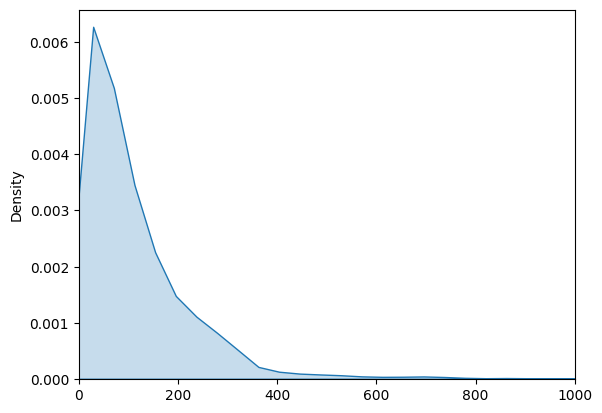

In [ ]:
import seaborn as sns
sns.kdeplot(x, fill = True)
plt.xlim(0, 1000)

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorize = TextVectorization(max_tokens = 30000,
                                   output_mode = 'int',
                                   output_sequence_length = 114)

In [ ]:
text_vectorize.adapt(x_train)

In [ ]:
random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorize([random_sentence])

Original text:
pasabahce whiskey glasses with beautiful gift box (325ml) set of 6 pieces the şişecam group was established in turkey in 1935. pasabahce is one of the worlds leading glassware brands in the world. with its well designed functional and fashionable items it aims to be a leading “value for money” manufacturer offering excellent value to consumers of all market segments. in the global market pasabahce is specialized for both home use and for the horeca sector hotels restaurants bars and catering services. pasabahce quality is the result of decades of glassware experience and continuous research in the tableware field and maintained through stringent quality controls at all stages of manufacturing and sales service that garnered them an iso 9000 certificate. pasabahce also uses its profound experience to provide its customers with glasses with the right shapes and sizes. whatever your tabletop glassware needs may be pasabahce has it. as it offers everything from tumblers stem

<tf.Tensor: shape=(1, 114), dtype=int64, numpy=
array([[ 4288,  5740,   983,     9,   239,   293,   266,     1,    33,
            4,   100,   415,     2, 20124,  1106,    85,  2101,     8,
         5323,     8,  7278,  4288,    10,    37,     4,     2,  1328,
          673,  1902,  2174,     8,     2,   124,     9,    42,   107,
           81,  1195,     3,  1490,   595,    13,  6304,     5,    22,
            6,   673, 17676,     7, 18153,   597,  1554,   562,   781,
            5,  3153,     4,    25,   937,  3179,     8,     2,  1286,
          937,  4288,    10,  4131,     7,   207,    52,    34,     3,
            7,     2, 20987,  6324,  2659,  3456,  3399,     3,  7435,
         1140,  4288,    35,    10,     2,  2163,     4,  1669,     4,
         1902,   146,     3,  2136,   358,     8,     2,  5920,   876,
            3,  6062,   168,  4049,    35,  1790,    26,    25,  5797,
            4,  1233,     3,  1958,   551,    16]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorize.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 30000
Top 5 most common words: ['', '[UNK]', 'the', 'and', 'of']
Bottom 5 least common words: ['tonya', 'tomorrow’s', 'tomes', 'tolerant', 'tolerable']


## Simple Dense Model

In [ ]:
import datetime
def tensorboard_callbacks(dirname, filename):
  log_dir = dirname + '/' + filename + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tf_callbacks = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  return tf_callbacks

save_dir = 'NLP_text_classification'

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorize(input)
embedding = layers.Embedding(input_dim = 30000,
                             output_dim = 128,
                             embeddings_initializer = 'uniform',
                             input_length = 114,
                             name = 'embedding_1')
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(4, activation = 'softmax')(x)
model_1 = tf.keras.Model(input,output, name = 'model_1')

In [ ]:
model_1.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 114)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 114, 128)          3840000   
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_28 (Dense)            (None, 4)                 516       
                                                                 
Total params: 3840516 (14.65 MB)
Trainable params: 3840516 

In [ ]:
history = model_1.fit(x_train,
                      y_train,
                      epochs = 5,
                      validation_data = (x_test, y_test),
                      callbacks = [tensorboard_callbacks(save_dir, 'model_1_simple')])

Epoch 1/5
1103/1103 [==============================] - 83s 75ms/step - loss: 0.5728 - accuracy: 0.8275 - val_loss: 0.2763 - val_accuracy: 0.9474
Epoch 2/5
1103/1103 [==============================] - 73s 66ms/step - loss: 0.2037 - accuracy: 0.9559 - val_loss: 0.1906 - val_accuracy: 0.9604
Epoch 3/5
1103/1103 [==============================] - 70s 63ms/step - loss: 0.1276 - accuracy: 0.9718 - val_loss: 0.1550 - val_accuracy: 0.9652
Epoch 4/5
1103/1103 [==============================] - 71s 64ms/step - loss: 0.0848 - accuracy: 0.9807 - val_loss: 0.1362 - val_accuracy: 0.9699
Epoch 5/5
1103/1103 [==============================] - 70s 63ms/step - loss: 0.0585 - accuracy: 0.9877 - val_loss: 0.1330 - val_accuracy: 0.9721


<Axes: >

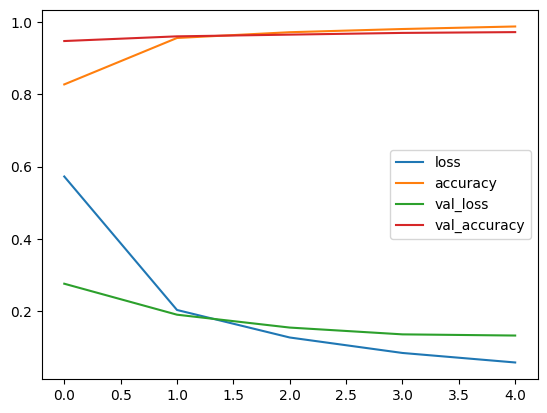

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
pred_prob = model_1.predict(x_test)
pred_prob[:10]

473/473 [==============================] - 2s 4ms/step


array([[5.9307873e-05, 9.9816823e-01, 2.2397653e-04, 1.5485163e-03],
       [6.4585097e-02, 9.8585570e-03, 5.2016277e-02, 8.7354016e-01],
       [9.9999076e-01, 1.8652980e-08, 2.0958373e-06, 7.0317242e-06],
       [3.4784156e-05, 9.9992770e-01, 8.0272112e-06, 2.9428982e-05],
       [1.2095344e-10, 3.4817590e-11, 9.9999982e-01, 9.3585783e-08],
       [1.1191413e-10, 2.4733179e-11, 2.7577326e-04, 9.9972427e-01],
       [9.2659110e-01, 6.4388006e-03, 1.6510075e-02, 5.0460033e-02],
       [1.5089649e-04, 9.9737829e-01, 1.0146075e-03, 1.4561593e-03],
       [9.9351525e-01, 7.7357958e-04, 2.6589555e-03, 3.0521178e-03],
       [2.7334271e-04, 8.5359170e-05, 6.9916144e-02, 9.2972511e-01]],
      dtype=float32)

In [ ]:
y_true = y_test
y_pred = pred_prob.argmax(axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_true = y_true,
                            y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3551
           1       0.99      0.97      0.98      2580
           2       0.97      0.96      0.97      3152
           3       0.96      0.98      0.97      5845

    accuracy                           0.97     15128
   macro avg       0.97      0.97      0.97     15128
weighted avg       0.97      0.97      0.97     15128



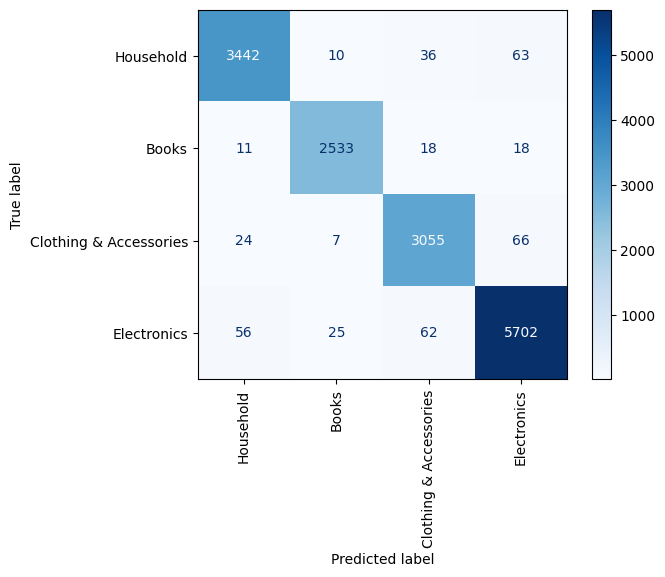

In [ ]:
cm = confusion_matrix(y_true,
                      y_pred)
cm_plt = ConfusionMatrixDisplay(cm, display_labels = df['label'].unique())
cm_plt.plot(cmap = 'Blues', xticks_rotation = 'vertical')

## Naive Bayes model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
accuracy = model_0.score(x_test, y_test)
print(f'Our Baseline Accuracy is {accuracy * 100: .2f}%')

Our Baseline Accuracy is  93.58%


In [ ]:
y_pred_naive = model_0.predict(x_test)
y_pred_naive[:10]

array([1, 3, 0, 1, 2, 3, 0, 1, 0, 3])

In [ ]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3551
           1       0.98      0.93      0.95      2580
           2       0.96      0.89      0.92      3152
           3       0.89      0.98      0.93      5845

    accuracy                           0.94     15128
   macro avg       0.95      0.93      0.94     15128
weighted avg       0.94      0.94      0.94     15128



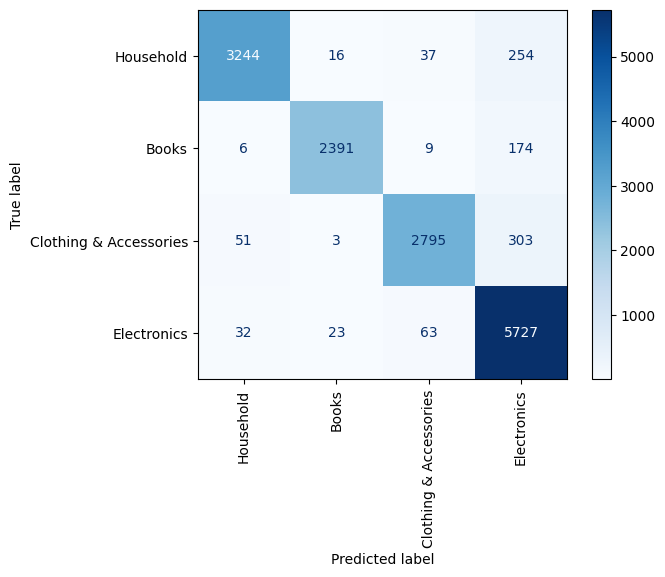

In [ ]:
cm = confusion_matrix(y_true, y_pred_naive)
cmd = ConfusionMatrixDisplay(cm, display_labels = df['label'].unique())
cmd.plot(cmap = 'Blues', xticks_rotation = 'vertical')

## Conv1D

In [ ]:
from tensorflow.keras import layers

input = layers.Input(shape = (1,), dtype = 'string', name = 'input_layer')
x = text_vectorize(input)
embed = layers.Embedding(input_dim = 30000,
                         output_dim = 256,
                         embeddings_initializer = 'uniform',
                         input_length = 114,
                         name = 'embedding_1')
x = embed(x)
x = layers.Conv1D(filters = 32, kernel_size = 5, activation = 'relu')(x)
x = layers.GlobalMaxPool1D(name = 'globalmaxpooling1D')(x)
output = layers.Dense(4, activation = 'softmax', name = 'output_layer')(x)
model_2 = tf.keras.Model(input, output)

model_2.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 114)               0         
 ctorization)                                                    
                                                                 
 embedding_1 (Embedding)     (None, 114, 256)          7680000   
                                                                 
 conv1d (Conv1D)             (None, 110, 32)           40992     
                                                                 
 globalmaxpooling1D (Global  (None, 32)                0         
 MaxPooling1D)                                                   
                                                                 
 output_layer (Dense)        (None, 4)                 132   

In [ ]:
history_2 = model_2.fit(x_train,
                        y_train,
                        epochs = 5,
                        validation_data = (x_test, y_test),
                        callbacks = [tensorboard_callbacks(save_dir, 'model_2_conv1d')])

Epoch 1/5
1103/1103 [==============================] - 176s 159ms/step - loss: 0.2605 - accuracy: 0.9148 - val_loss: 0.1070 - val_accuracy: 0.9710
Epoch 2/5
1103/1103 [==============================] - 175s 159ms/step - loss: 0.0454 - accuracy: 0.9881 - val_loss: 0.0829 - val_accuracy: 0.9783
Epoch 3/5
1103/1103 [==============================] - 174s 158ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0967 - val_accuracy: 0.9782
Epoch 4/5
1103/1103 [==============================] - 174s 158ms/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.0949 - val_accuracy: 0.9801
Epoch 5/5
1103/1103 [==============================] - 173s 157ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.1045 - val_accuracy: 0.9801


## Transfer Learning

In [ ]:
import tensorflow_hub as hub

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
base_embed = hub.KerasLayer('https://tfhub.dev/google/Wiki-words-500/2',
                            input_shape = [],
                            dtype = tf.string,
                            trainable = False,
                            name = 'word2vec')
model_3 = Sequential([
    base_embed,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
], name = 'model_transfer_learning')

model_3.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "model_transfer_learning"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word2vec (KerasLayer)       (None, 500)               504687500 
                                                                 
 dense_29 (Dense)            (None, 64)                32064     
                                                                 
 dense_30 (Dense)            (None, 4)                 260       
                                                                 
Total params: 504719824 (1.88 GB)
Trainable params: 32324 (126.27 KB)
Non-trainable params: 504687500 (1.88 GB)
_________________________________________________________________


In [ ]:
history_3 = model_3.fit(x_train,
                        y_train,
                        validation_data = (x_test, y_test),
                        epochs = 5,
                        callbacks = [tensorboard_callbacks('NLP_text_classification', 'transfer_learning_word2vec')])

Epoch 1/5
1103/1103 [==============================] - 10s 8ms/step - loss: 0.3708 - accuracy: 0.8949 - val_loss: 0.2876 - val_accuracy: 0.9177
Epoch 2/5
1103/1103 [==============================] - 9s 8ms/step - loss: 0.2691 - accuracy: 0.9251 - val_loss: 0.2601 - val_accuracy: 0.9254
Epoch 3/5
1103/1103 [==============================] - 10s 9ms/step - loss: 0.2472 - accuracy: 0.9297 - val_loss: 0.2457 - val_accuracy: 0.9293
Epoch 4/5
1103/1103 [==============================] - 9s 8ms/step - loss: 0.2280 - accuracy: 0.9365 - val_loss: 0.2319 - val_accuracy: 0.9350
Epoch 5/5
1103/1103 [==============================] - 8s 8ms/step - loss: 0.2142 - accuracy: 0.9395 - val_loss: 0.2297 - val_accuracy: 0.9337


In [ ]:
embed_weights = model_3.get_layer("word2vec").get_weights()[0]

In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## LSTM Model

In [ ]:
tf.random.set_seed(42)

embed_1 = layers.Embedding(input_dim = 30000,
                           output_dim = 128,
                           embeddings_initializer = 'uniform',
                           input_length = 114,
                           name = 'embedding_2')

input_text = layers.Input(shape = (1,), dtype = 'string', name = 'input_layer')
x = text_vectorize(input_text)
x = embed_1(x)
print(x.shape)
x = layers.LSTM(64, return_sequences = True)(x)
x = layers.LSTM(64)(x)
print(x.shape)
x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(4, activation = 'softmax', name = 'output_layer')(x)

model_4 = tf.keras.Model(input_text, output, name = 'model_lstm')

(None, 114, 128)
(None, 64)


In [ ]:
model_4.summary()

Model: "model_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 114)               0         
 ctorization)                                                    
                                                                 
 embedding_2 (Embedding)     (None, 114, 128)          3840000   
                                                                 
 lstm_26 (LSTM)              (None, 114, 64)           49408     
                                                                 
 lstm_27 (LSTM)              (None, 64)                33024     
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                        

In [ ]:
model_4.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

In [ ]:
history_4 = model_4.fit(x_train,
                        y_train,
                        validation_data = (x_test, y_test),
                        epochs = 5,
                        callbacks = [tensorboard_callbacks('NLP_text_classification', 'model_4_lstm')])

Epoch 1/5
1103/1103 [==============================] - 287s 256ms/step - loss: 0.9822 - accuracy: 0.5866 - val_loss: 0.7756 - val_accuracy: 0.6873
Epoch 2/5
1103/1103 [==============================] - 267s 242ms/step - loss: 0.6966 - accuracy: 0.7393 - val_loss: 0.3324 - val_accuracy: 0.9143
Epoch 3/5
1103/1103 [==============================] - 281s 254ms/step - loss: 0.2116 - accuracy: 0.9467 - val_loss: 0.1626 - val_accuracy: 0.9613
Epoch 4/5
1103/1103 [==============================] - 279s 253ms/step - loss: 0.0947 - accuracy: 0.9790 - val_loss: 0.1312 - val_accuracy: 0.9703
Epoch 5/5
1103/1103 [==============================] - 278s 252ms/step - loss: 0.0642 - accuracy: 0.9861 - val_loss: 0.1294 - val_accuracy: 0.9715


## Gru Model

In [ ]:
embedding_gru = layers.Embedding(input_dim = 30000,
                                 output_dim = 128,
                                 input_length = 114,
                                 embeddings_initializer = 'uniform',
                                 name = 'embedding_gru')
input = layers.Input(shape = (1,), dtype = 'string', name = 'input_layer')
x = text_vectorize(input)
x = embedding_gru(x)
x = layers.GRU(64, return_sequences = True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(32, activation = 'relu')(x)
output = layers.Dense(4, 'softmax', name = 'output_layer')(x)
model_5 = tf.keras.Model(input, output, name = 'model_5_gru')

model_5.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

In [ ]:
model_5.summary()

Model: "model_5_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 114)               0         
 ctorization)                                                    
                                                                 
 embedding_gru (Embedding)   (None, 114, 128)          3840000   
                                                                 
 gru (GRU)                   (None, 114, 64)           37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                       

In [ ]:
model_5.fit(x_train,
            y_train,
            validation_data = (x_test, y_test),
            epochs = 5,
            callbacks = [tensorboard_callbacks('NLP_text_classification', 'GRU')])

Epoch 1/5
1103/1103 [==============================] - 256s 227ms/step - loss: 0.5557 - accuracy: 0.7905 - val_loss: 0.1701 - val_accuracy: 0.9555
Epoch 2/5
1103/1103 [==============================] - 246s 223ms/step - loss: 0.0973 - accuracy: 0.9741 - val_loss: 0.1194 - val_accuracy: 0.9658
Epoch 3/5
1103/1103 [==============================] - 250s 227ms/step - loss: 0.0372 - accuracy: 0.9909 - val_loss: 0.1195 - val_accuracy: 0.9714
Epoch 4/5
1103/1103 [==============================] - 247s 224ms/step - loss: 0.0216 - accuracy: 0.9944 - val_loss: 0.1204 - val_accuracy: 0.9745
Epoch 5/5
1103/1103 [==============================] - 249s 225ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 0.1424 - val_accuracy: 0.9706


In [ ]:
!tensorboard dev upload --logdir ./NLP_text_classification \
  --name 'NLP Classification experiment' \
  --description 'A Series of different model experiment' \
  --one_shot

2023-10-26 06:04:00.235724: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 06:04:00.235835: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 06:04:00.236041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 06:04:02.676541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./NLP_text_classification

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Y

In [ ]:
!tensorboard dev list

2023-10-26 06:07:04.025407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 06:07:04.025485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 06:07:04.025518: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 06:07:05.363944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

****************************************************************
****************************************************************
****************************************************************

NOTICE - ACTION REQUIRED: TensorBoard.dev

In [ ]:
df.head()

,label,text,label_encode,clean_text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3,saf floral framed painting (wood 30 inch x 10 ...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3,saf uv textured modern art print framed painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3,saf flower print framed painting (synthetic 13...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,3,incredible gifts india wooden happy birthday u...


In [ ]:
df['label'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)